<a href="https://colab.research.google.com/github/lagerasimov/-/blob/main/linkedin_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/linkedin_job_postings.csv', on_bad_lines = 'skip')
df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


In [ ]:
a = df['job_title']
d = dict()
for x in a:
  d[x] = d.setdefault(x, 0) + 1
sorted_searchs = dict(sorted(d.items(), key = lambda x: x[1], reverse = True))
top_ten = dict()
k = 0
for key, value in sorted_searchs.items():
  top_ten[key] = value;
  k += 1
  if k == 5:
    break
top_ten

{'LEAD SALES ASSOCIATE-FT': 7325,
 'Shift Manager': 5818,
 'First Year Tax Professional': 5356,
 'Assistant Manager': 5346,
 'Customer Service Representative': 5203}

In [ ]:
# import matplotlib.pyplot as plt
# plt.bar(top_ten.values(), labels=top_ten.keys())
# plt.title("Топ 5 должностей")
# plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

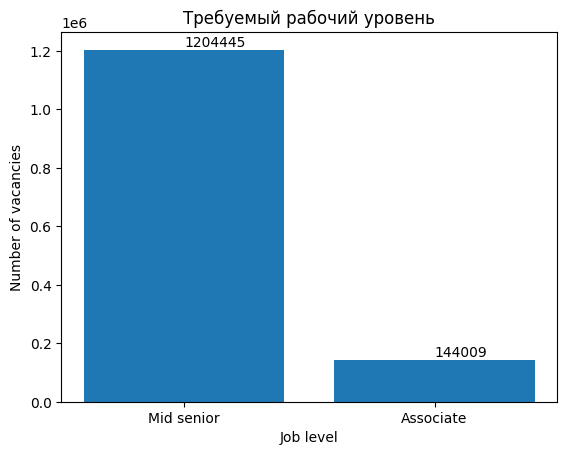

{'Mid senior': 1204445, 'Associate': 144009}

In [ ]:
df = df.fillna('Unknown')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+10000,y[i])

a = df['job_level']
types = dict()

for x in a:
  types[x] = types.setdefault(x, 0) + 1
types

plt.bar(types.keys(), types.values())
plt.xlabel('Job level')
plt.ylabel('Number of vacancies')
addlabels(list(types.keys()), list(types.values()))
plt.title('Требуемый рабочий уровень')
plt.show()
types

In [ ]:
companies = df['company']
cities = df['search_city']
d1 = {}
for i in range(len(companies)):
  d1.setdefault(companies[i], set()).add(cities[i])
d1

{'BD': {'Bayonne',
  'Beverly',
  'Bordentown',
  'Bountiful',
  'Colorado',
  'Coronado',
  'Durham',
  'East Chicago',
  'El Centro',
  'Great Barrington',
  'Illinois',
  'Leavenworth',
  'Livermore',
  'Montpelier',
  'Montrose',
  'Narragansett',
  'Nashville',
  'Nebraska',
  'Newport',
  'North Carolina',
  'Nyack',
  'Oak Ridge',
  'Oceanside',
  'Peoria',
  'Plymouth',
  'Raleigh',
  'San Antonio',
  'Savannah',
  'Stockbridge',
  'Tooele',
  'Towson',
  'Waterford',
  'West Covina',
  'Wichita'},
 'Trinity Health MI': {'Andalusia',
  'Ann Arbor',
  'Chelsea',
  'Grand Haven',
  'Grand Rapids',
  'Hollywood',
  'Macomb',
  'Michigan',
  'Monroe',
  'Muskegon',
  'Oak Park',
  'Pittsfield',
  'Waterloo'},
 'Wasatch Adaptive Sports': {'American Fork', 'Heber City', 'Tooele'},
 'Howard Hanna | Rand Realty': {'Bound Brook',
  'Fort Lee',
  'Irvington',
  'Montrose',
  'New Jersey',
  'New Windsor',
  'New York',
  'Nyack',
  'Oak Ridge',
  'Pinehurst'},
 'IRS, Office of Chief Coun

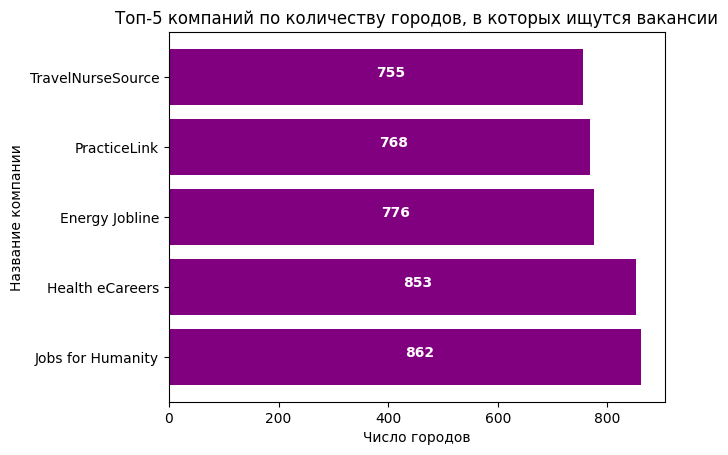

In [ ]:
lens = dict()
for key, value in d1.items():
  lens[key] = len(value)
sorted_lens = dict(sorted(lens.items(), key = lambda x: x[1], reverse = True))
keys = list(sorted_lens.keys())[:5]
values = list(sorted_lens.values())[:5]
plt.barh(keys, values, color = 'purple')
plt.title('Топ-5 компаний по количеству городов, в которых ищутся вакансии')
plt.xlabel('Число городов')
plt.ylabel('Название компании')
for i in range(5):
  plt.text(values[i]/2, i, values[i], color='white', weight = 'bold')
plt.show()

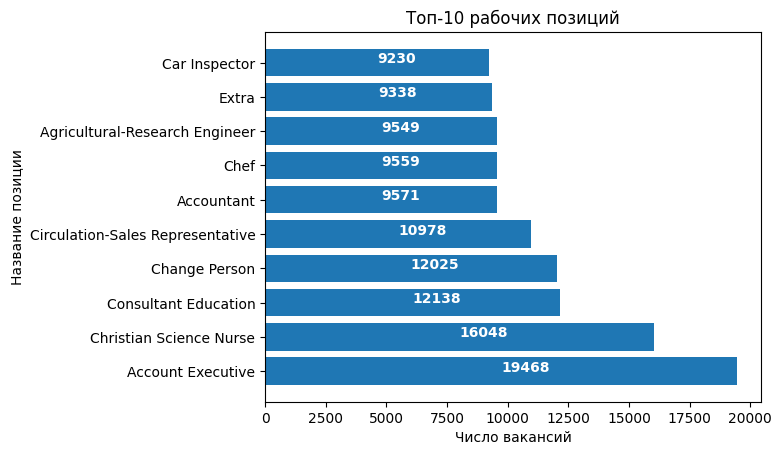

In [ ]:
positions = df['search_position']
count_positions = dict()

for x in positions:
  count_positions[x] = count_positions.setdefault(x, 0) + 1

sorted_positions = dict(sorted(count_positions.items(), key = lambda x: x[1], reverse = True))
topTen_keys = list(sorted_positions)[:10]
topTen_values = list(sorted_positions.values())[:10]

plt.barh(topTen_keys, topTen_values)
plt.xlabel('Число вакансий')
plt.ylabel('Название позиции')
plt.title('Топ-10 рабочих позиций')
for i in range(10):
  plt.text(topTen_values[i]/2, topTen_keys[i], topTen_values[i], color = 'white', weight = 'bold')
plt.show()

In [ ]:
ones_positions = dict(sorted(count_positions.items(), key = lambda x: x[1]))
ones_positions

In [ ]:
posit = list()
for key, value in ones_positions.items():
  if value == 1:
    posit.append(key)
print("Самые непопулярные позиции (всего по одной вакансии):")

for x in posit:
  print(x)

In [ ]:
print("Число различных позиций:", len(count_positions.keys()))

Число различных позиций: 1993


In [ ]:
# df1 = pd.read_csv("/content/drive/MyDrive/job_summary.csv")
# df1

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/job_skills.csv")
df2

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."


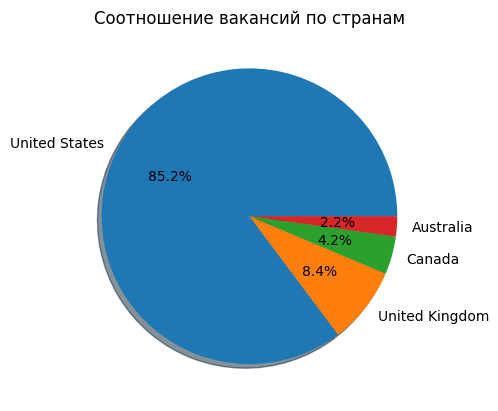

In [ ]:
countries = df['search_country']
dCountries = dict()
for x in countries:
  dCountries[x] = dCountries.setdefault(x, 0) + 1
dCountries
plt.pie(dCountries.values(), labels=dCountries.keys(), shadow = True, autopct='%1.1f%%')
plt.title('Соотношение вакансий по странам')
plt.show()

In [ ]:
countries = df['search_country']
positions = df['search_position']
dUSA = dict()
dUK = dict()
dCanada = dict()
dA = dict()
for i in range(len(positions)):
  if countries[i] == 'United States':
    dUSA[positions[i]] = dUSA.setdefault(positions[i], 0) + 1
  elif countries[i] == 'United Kingdom':
    dUK[positions[i]] = dUK.setdefault(positions[i], 0) + 1
  elif countries[i] == 'Canada':
    dCanada[positions[i]] = dCanada.setdefault(positions[i], 0) + 1
  elif countries[i] == 'Australia':
    dA[positions[i]] = dA.setdefault(positions[i], 0) + 1

sorted_dUSA = dict(sorted(dUSA.items(), key = lambda x: x[1], reverse = True))
sorted_dUK = dict(sorted(dUK.items(), key = lambda x: x[1], reverse = True))
sorted_dCanada = dict(sorted(dCanada.items(), key = lambda x: x[1], reverse = True))
sorted_dA = dict(sorted(dA.items(), key = lambda x: x[1], reverse = True))
s = [sorted_dUSA, sorted_dUK, sorted_dCanada, sorted_dA]
c = ['США', 'Великобритании', 'Канаде', 'Австралии']
colors = ['green', 'pink', 'yellow', 'brown']
colors1 = ['white', 'black', 'black', 'white']

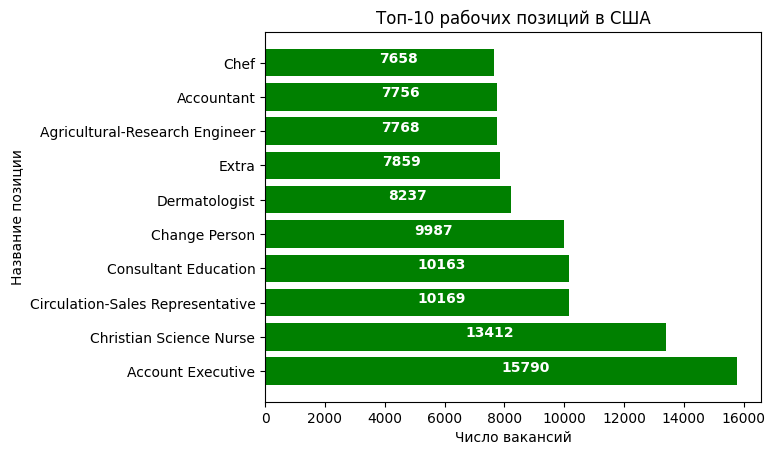

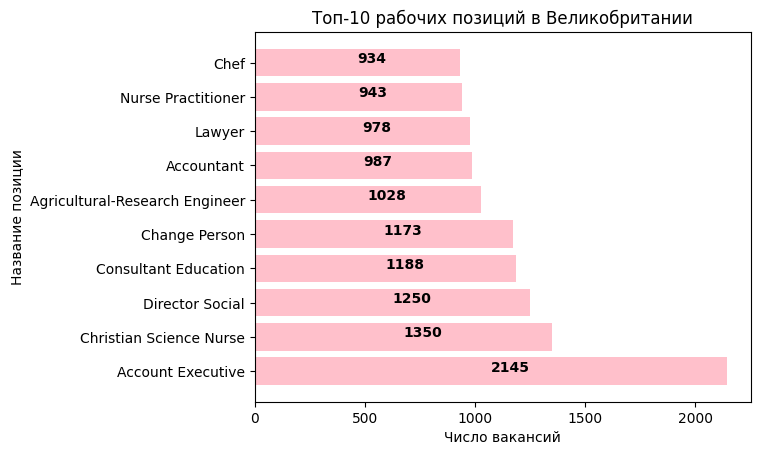

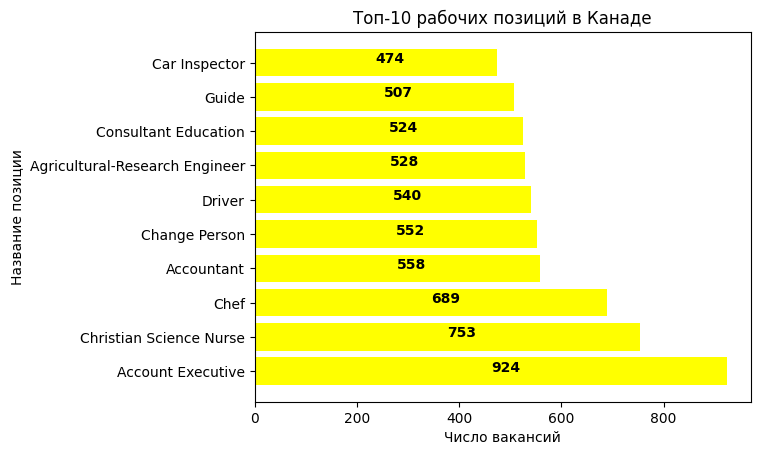

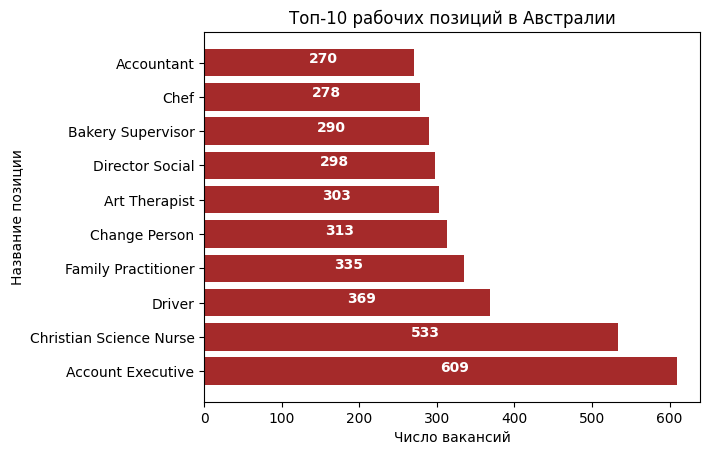

In [ ]:
for i in range(len(s)):
  keys = list(s[i].keys())[:10]
  values = list(s[i].values())[:10]
  plt.barh(keys, values, color = colors[i])
  plt.xlabel('Число вакансий')
  plt.ylabel('Название позиции')
  plt.title(f'Топ-10 рабочих позиций в {c[i]}')
  for j in range(10):
    plt.text(values[j]/2, keys[j], values[j], color = colors1[i], weight = 'bold')
  plt.show()

In [ ]:
skills = list(df2['job_skills'])
print(len(skills))
dSkills = dict()
for i in range(len(skills)):
  a = str(skills[i]).split(", ")
  for x in a:
    dSkills[x.lower()] = dSkills.setdefault(x.lower(), 0) + 1

1296381


['communication', 'customer service', 'teamwork', 'communication skills', 'leadership', 'problem solving', 'time management', 'attention to detail', 'problemsolving', 'project management', 'interpersonal skills', 'patient care', 'sales', 'nursing', 'collaboration', 'training', 'data analysis', 'microsoft office suite', 'organizational skills', 'inventory management']


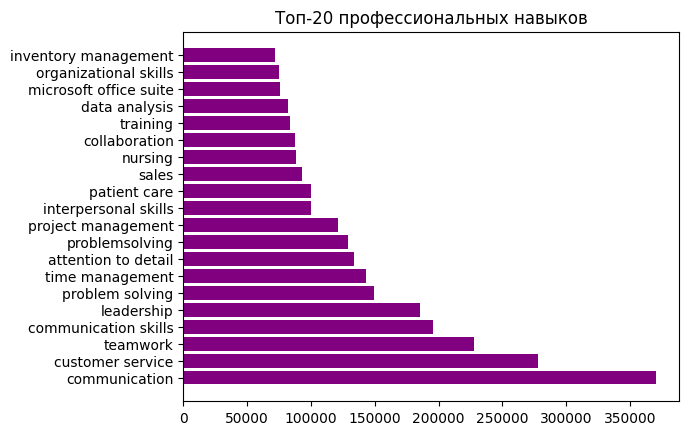

In [ ]:
sorted_skills = dict(sorted(dSkills.items(), key = lambda x: x[1], reverse = True))
keys_20 = list(sorted_skills.keys())[:20]
values_20 = list(sorted_skills.values())[:20]
plt.barh(keys_20, values_20, color = "purple")
plt.title('Топ-20 профессиональных навыков')
print(keys_20)
# for j in range(20):
#     plt.text(values_20[j]/4, keys_20[j], values_20[j], color = 'black')
plt.show()

In [ ]:
values_20[0] += values_20[3]
keys_20.remove(keys_20[3])
print(len(keys_20))
print(len(values_20))
values_20[4] += values_20[7]
keys_20.remove(keys_20[7])

19
20


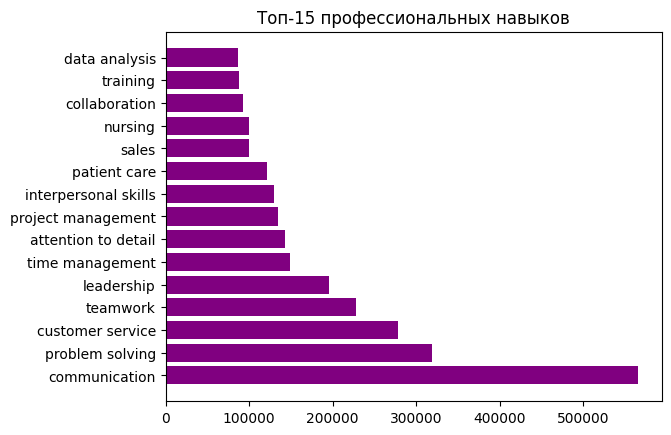

In [ ]:
keys_15 = keys_20[:15]
values_15 = values_20[:15]
dict_15 = dict(zip(keys_15, values_15))
top_15 = dict(sorted(dict_15.items(), key = lambda x: x[1], reverse = True))
plt.barh(list(top_15.keys()), list(top_15.values()), color='purple')
plt.title('Топ-15 профессиональных навыков')
plt.show()

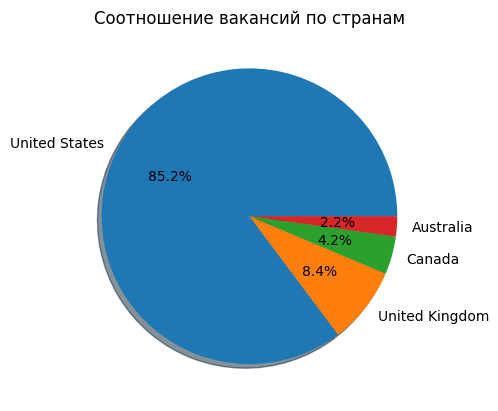

In [ ]:
b = df['search_country'].value_counts()
plt.pie(b.values, labels = b.index, shadow = True, autopct = '%1.1f%%')
plt.title('Соотношение вакансий по странам')
plt.show()

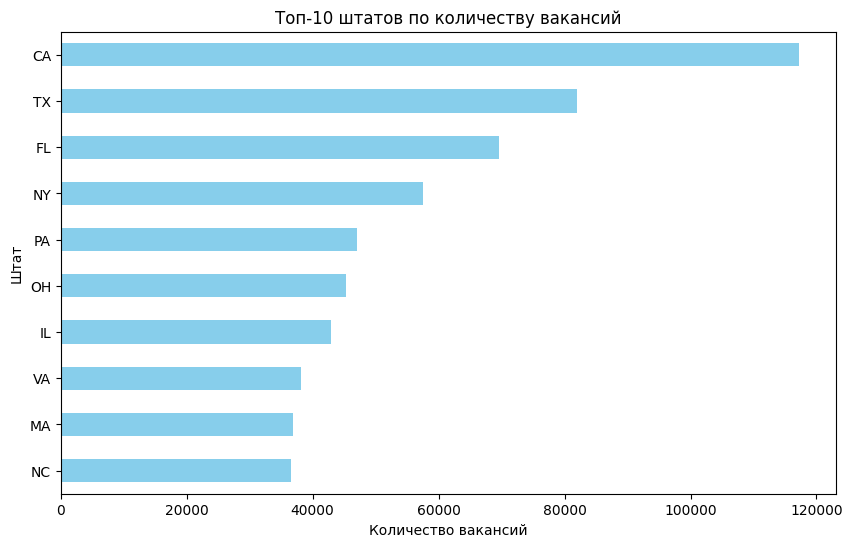

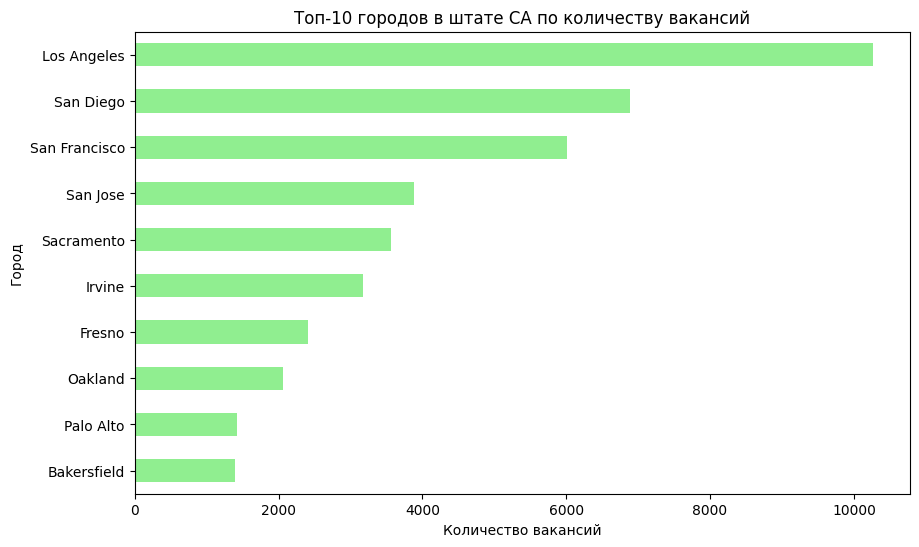

In [ ]:
# Подсчет количества вакансий в каждом штате, исключая England
locations = df['job_location'].str.split(', ', expand=True)
states = locations[1]
state_counts = states[states != 'England'].value_counts()

# Выбор самого популярного штата
most_popular_state = state_counts.idxmax()

# Выбор городов в самом популярном штате, исключая England
popular_state_cities = locations[0][(states == most_popular_state) & (states != 'England')]
popular_state_city_counts = popular_state_cities.value_counts().head(10)

# Визуализация топ-10 штатов по количеству вакансий, исключая England
plt.figure(figsize=(10, 6))
state_counts.head(10).plot(kind='barh', color='skyblue')
plt.xlabel('Количество вакансий')
plt.ylabel('Штат')
plt.title('Топ-10 штатов по количеству вакансий')
plt.gca().invert_yaxis()
plt.show()

# Визуализация топ-10 городов в самом популярном штате, исключая England
plt.figure(figsize=(10, 6))
popular_state_city_counts.plot(kind='barh', color='lightgreen')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.title(f'Топ-10 городов в штате {most_popular_state} по количеству вакансий')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# a = df1['job_summary']
# words = dict()
# for x in a:
#   p = x.split()
#   for s in p:
#     words[s] = words.setdefault(s, 0) + 1
# words

In [ ]:
# sorted_words = dict(sorted(words.items(), key = lambda x: x[1], reverse = True))
# sorted_words

In [ ]:
# import matplotlib.pyplot as plt

# # Подсчет среднего количества слов в каждом job summary
# word_counts = df1['job_summary'].str.split().apply(len)
# average_word_count = word_counts.mean()

# # Создание гистограммы для визуализации распределения количества слов в job summary
# plt.figure(figsize=(10, 6))
# plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
# plt.axvline(average_word_count, color='red', linestyle='dashed', linewidth=1)
# plt.xlabel('Количество слов в job summary')
# plt.ylabel('Частота')
# plt.title('Распределение количества слов в job summary')
# plt.text(average_word_count + 5, 200, f'Среднее количество слов: {average_word_count:.2f}', color='red')
# plt.show()
